# Object Detection Tasks
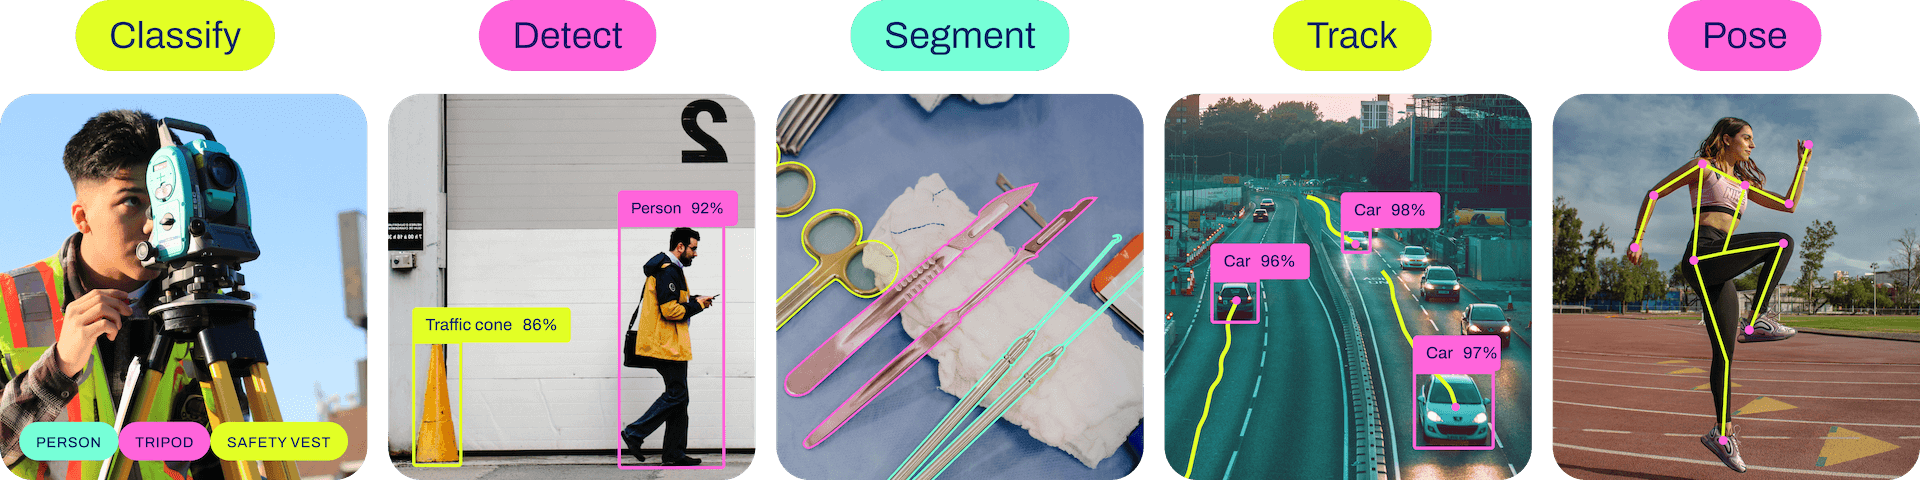

# Haar Cascades

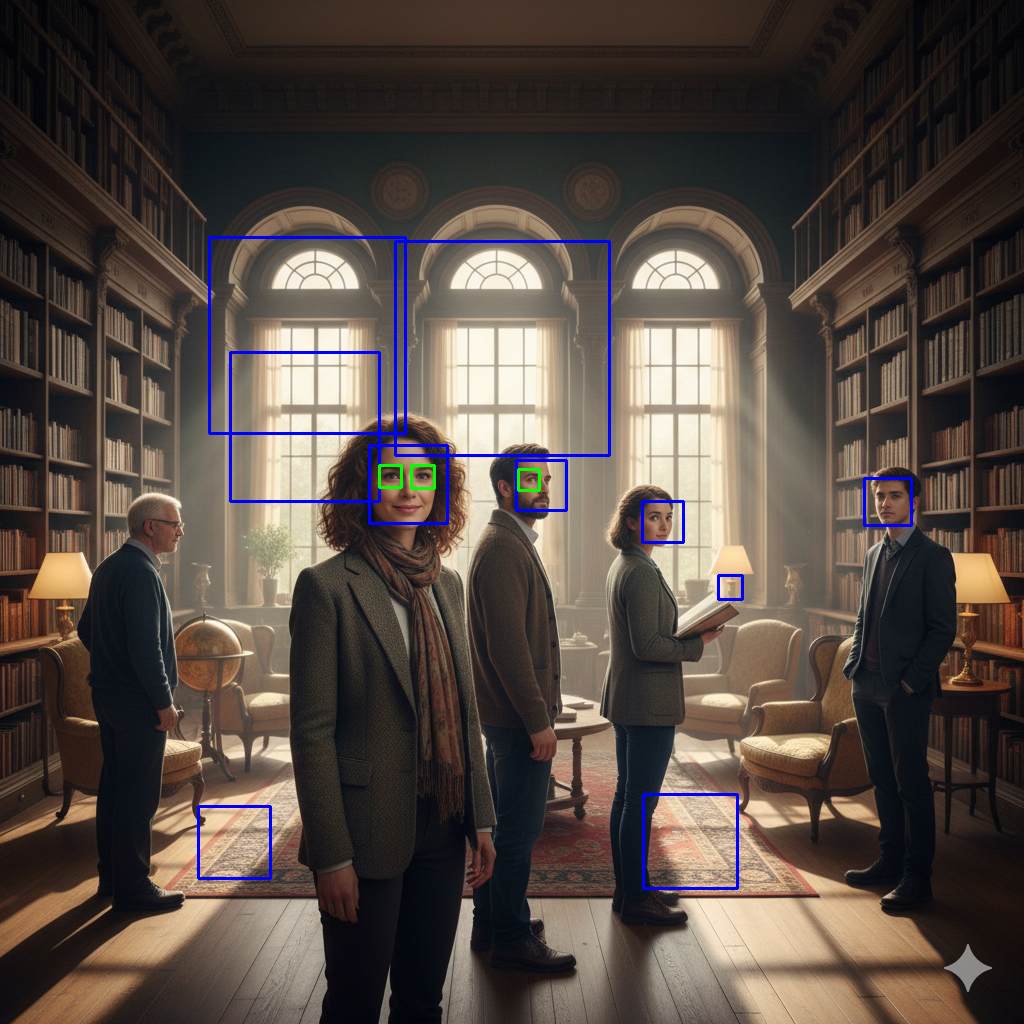

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


img = cv2.imread("img.png")

if img is None:
    print("Error: Could not load image.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.2, 1)


    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2_imshow(img)

# Playing with Yolo v8

### 0. Setup

In [7]:
!pip install ultralytics

import ultralytics

ultralytics.checks()

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/107.7 GB disk)


### 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [8]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 375.6ms
Speed: 12.8ms preprocess, 375.6ms inference, 40.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


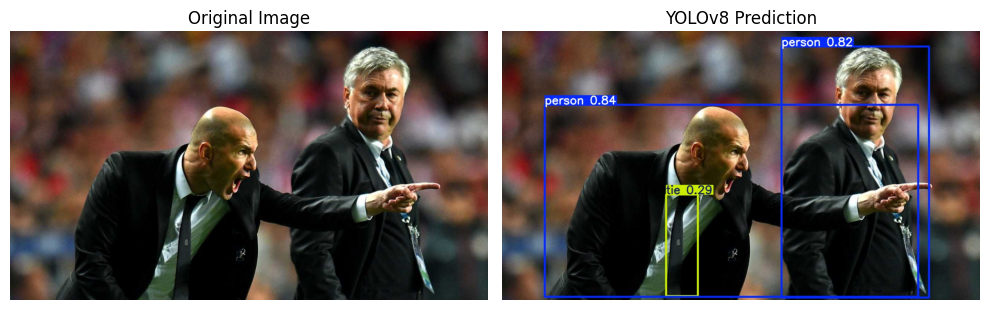

In [9]:
import matplotlib.pyplot as plt

img1 = cv2.imread("zidane.jpg")
img2 = cv2.imread("/content/runs/detect/predict/zidane.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
axes[0].imshow(img1_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off') # Hide axes

axes[1].imshow(img2_rgb)
axes[1].set_title("YOLOv8 Prediction")
axes[1].axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 294.6ms
Speed: 4.9ms preprocess, 294.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


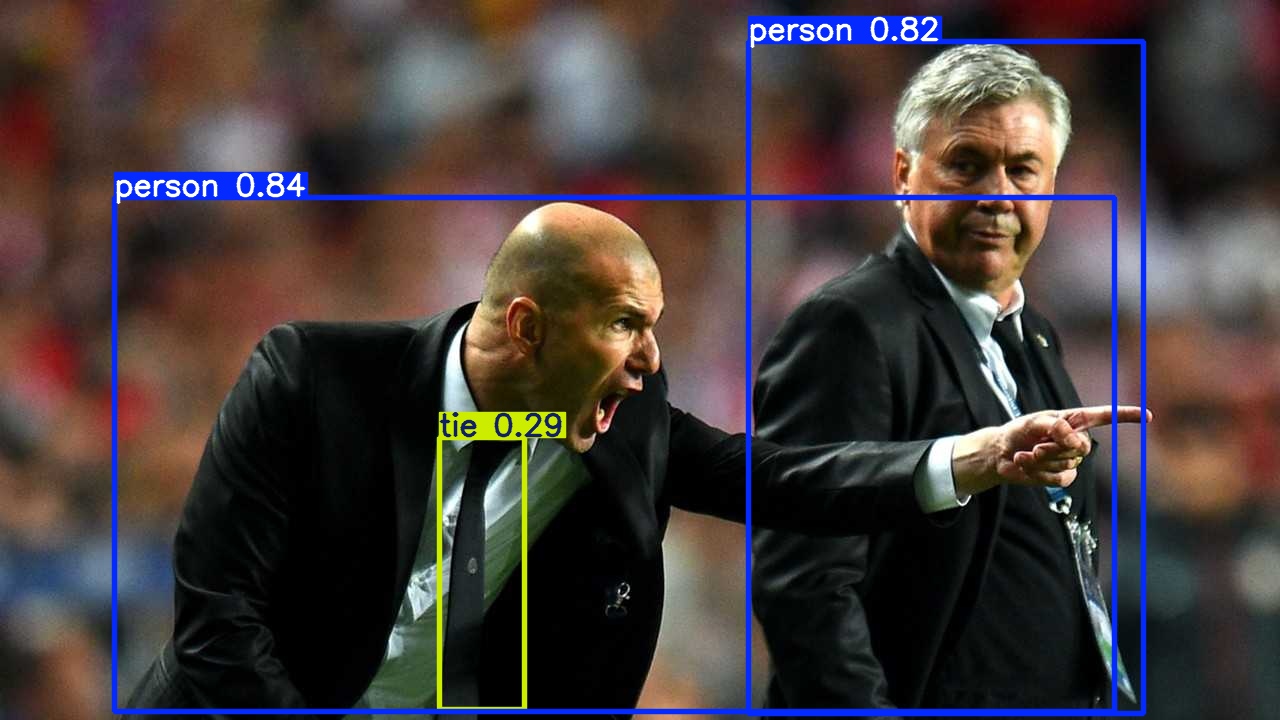

In [10]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

model = YOLO('yolov8n.pt')

results = model('https://ultralytics.com/images/zidane.jpg')

annotated_img = results[0].plot()

cv2_imshow(annotated_img)

In [3]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Initialize the YOLO model
model = YOLO('yolov8n.pt')

# Initialize video capture from the default camera (usually 0)
# If you have multiple cameras, you might need to change the index
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video capture
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Error: Could not open camera.
